In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('drug_sample.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
y = df.Drug
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [ ]:
X = df.iloc[:, 0:5]
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [ ]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [ ]:
df._get_numeric_data().columns

Index(['Age', 'Na_to_K'], dtype='object')

In [ ]:
numeric_X = df._get_numeric_data()
numeric_X

,Age,Na_to_K
0,23,25.355
1,47,13.093
2,47,10.114
3,28,7.798
4,61,18.043
...,...,...
195,56,11.567
196,16,12.006
197,52,9.894
198,23,14.020


In [ ]:
categorical_X = X.select_dtypes(include=['object'])
categorical_X

,Sex,BP,Cholesterol
0,F,HIGH,HIGH
1,M,LOW,HIGH
2,M,LOW,HIGH
3,F,NORMAL,HIGH
4,F,LOW,HIGH
...,...,...,...
195,F,LOW,HIGH
196,M,LOW,HIGH
197,M,NORMAL,HIGH
198,M,NORMAL,NORMAL


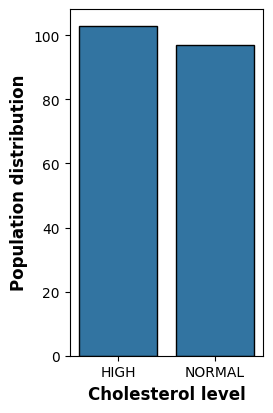

In [ ]:
plt.figure(figsize=(2.5,4.5))
sns.countplot(x='Cholesterol', data=df, edgecolor='Black')
plt.xlabel('Cholesterol level', fontsize=12, fontweight="bold")
plt.ylabel('Population distribution', fontsize=12, fontweight="bold")
plt.savefig('Cholerterol distribution')

Categorical vs categorical/target - tabele wielodzielcze -> test chi2 (or other)
Categorical vs numerical - test t studenta
Numerical vs target - ANOVA

In [ ]:
# Corelation analysys for categorical variables

In [ ]:
label_encoder = LabelEncoder()
y_encode = label_encoder.fit_transform(y)
y_encode

array([4, 2, 2, 3, 4, 3, 4, 2, 4, 4, 2, 4, 4, 4, 3, 4, 3, 0, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 1, 3, 4, 3, 3, 0, 3, 3, 3, 4, 1, 4, 3,
       3, 3, 0, 2, 4, 4, 4, 3, 4, 4, 1, 2, 1, 4, 3, 4, 4, 0, 4, 3, 1, 4,
       0, 3, 4, 4, 1, 4, 3, 4, 4, 4, 0, 4, 0, 3, 1, 3, 2, 0, 2, 1, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 2, 3, 4, 3, 3, 4, 1, 4,
       0, 3, 3, 3, 3, 4, 3, 3, 0, 4, 4, 4, 4, 4, 1, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 1, 0, 1, 3, 0, 4, 1, 4, 0, 3, 3, 0, 3, 2, 0, 1, 3, 3,
       4, 2, 0, 4, 2, 3, 3, 1, 3, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 4, 0, 4,
       0, 4, 4, 4, 4, 3, 3, 4, 4, 4, 1, 0, 4, 4, 4, 0, 4, 2, 4, 2, 2, 3,
       3, 3])

In [ ]:
feature_encoder = OneHotEncoder()
X_encode = feature_encoder.fit_transform(categorical_X)
X_encode

<200x7 sparse matrix of type '<class 'numpy.float64'>'
	with 600 stored elements in Compressed Sparse Row format>

In [ ]:
# Split categorical data (Sex, BP, Cholesterol)
cat_X_train, cat_X_test, cat_y_train, cat_y_test = train_test_split(X_encode, y_encode, test_size=0.3, stratify=y_encode, random_state=1)

In [ ]:
# Split numerical data (Age, Na_to_K)
num_X_train, num_X_test, num_y_train, num_y_test = train_test_split(numeric_X, y, test_size=0.3, stratify=y, random_state=1)

In [ ]:
# Hyperparameter tuning for categorical Naive Bayes model
param_grid = {'alpha': np.logspace(0,-9, num=100)}
model = MultinomialNB()
grid_search = GridSearchCV(model, param_grid, scoring='accuracy')
grid_search.fit(cat_X_train, cat_y_train)
best_params = grid_search.best_params_
best_params

{'alpha': 0.1873817422860384}

In [ ]:
# Categorical NB model prediction
cat_NB_model = MultinomialNB(alpha=best_params['alpha'])
cat_NB_model.fit(cat_X_train, cat_y_train)
y_pred = cat_NB_model.predict(cat_X_test)
accuracy = accuracy_score(cat_y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.43333333333333335


In [ ]:
# Hyperparameter tuning for numerical Naive Bayes model
param_grid = {'alpha': np.logspace(0,-9, num=100)}
model = MultinomialNB()
grid_search = GridSearchCV(model, param_grid, scoring='accuracy')
grid_search.fit(num_X_train, num_y_train)
best_params = grid_search.best_params_
best_params

{'alpha': 1.0}

In [ ]:
# Numerical NB model prediction
num_NB_model = MultinomialNB(alpha=best_params['alpha'])
num_NB_model.fit(num_X_train, num_y_train)
y_pred = num_NB_model.predict(num_X_test)
accuracy = accuracy_score(num_y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4666666666666667


In [ ]:
# Hyperparameter tuning for categorical Gaussian Naive Bayes model
cat_X_train_array = cat_X_train.toarray()
cat_X_test_array = cat_X_test.toarray()
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
model = GaussianNB()
grid_search = GridSearchCV(model, param_grid, scoring='accuracy')
grid_search.fit(cat_X_train_array, cat_y_train)
best_params = grid_search.best_params_
best_params

{'var_smoothing': 1.0}

In [ ]:
# Categorical Gaussian Naive Bayes model prediction
cat_GNB_model = GaussianNB(var_smoothing=best_params['var_smoothing'])
cat_GNB_model.fit(cat_X_train_array, cat_y_train)
y_train_pred = cat_GNB_model.predict(cat_X_train_array)
y_test_pred = cat_GNB_model.predict(cat_X_test_array)
train_accuracy = accuracy_score(cat_y_train, y_train_pred)
test_accuracy = accuracy_score(cat_y_test, y_test_pred)
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Train accuracy: 0.5785714285714286
Test accuracy: 0.38333333333333336


In [ ]:
# Hyperparameter tuning for categorical Random Forest Classifier model
param_grid = {'n_estimators': [10, 100, 1000],
              'max_leaf_nodes': [10, 100, 1000]}
model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid, scoring='accuracy')
grid_search.fit(cat_X_train, cat_y_train)
best_params = grid_search.best_params_
best_params

{'max_leaf_nodes': 1000, 'n_estimators': 10}

In [ ]:
# Categorical Random Forest Classifier model prediction
cat_RFC_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_leaf_nodes=best_params['max_leaf_nodes'])
cat_RFC_model.fit(cat_X_train, cat_y_train)
y_train_pred = cat_RFC_model.predict(cat_X_train)
y_test_pred = cat_RFC_model.predict(cat_X_test)
train_accuracy = accuracy_score(cat_y_train, y_train_pred)
test_accuracy = accuracy_score(cat_y_test, y_test_pred)
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Train accuracy: 0.6214285714285714
Test accuracy: 0.38333333333333336


In [ ]:
# Hyperparameter tuning for numerical Random Forest Classifier model
param_grid = {'n_estimators': [10, 100, 1000],
              'max_leaf_nodes': [10, 100, 1000]}
model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid, scoring='accuracy')
grid_search.fit(num_X_train, num_y_train)
best_params = grid_search.best_params_
best_params

{'max_leaf_nodes': 10, 'n_estimators': 10}

In [ ]:
# Numerical Random Forest Classifier model prediction
num_RFC_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_leaf_nodes=best_params['max_leaf_nodes'])
num_RFC_model.fit(num_X_train, num_y_train)
y_train_pred = num_RFC_model.predict(num_X_train)
y_test_pred = num_RFC_model.predict(num_X_test)
train_accuracy = accuracy_score(num_y_train, y_train_pred)
test_accuracy = accuracy_score(num_y_test, y_test_pred)
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Train accuracy: 0.8285714285714286
Test accuracy: 0.7
